We start with importing all necessary components:

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

Then we will put the minimum energy at the top of a matrix, and then at movement downwards it will increase. It is only for our convenience (in qutip it is realized on the contrary). To do this, we will take another definition of $\sigma_+$ and $\sigma_-$:

In [2]:
sp = sigmam()
sm = sigmap()

Let's consider a situation where there is a qubit in an excited state, and it connects to an oscillator ($\lambda$ is a coupling factor, we difine it as lam). For simplicity we consider a simplified Hamiltonian from the Jaynes–Cummings model. We want to know what will happen:

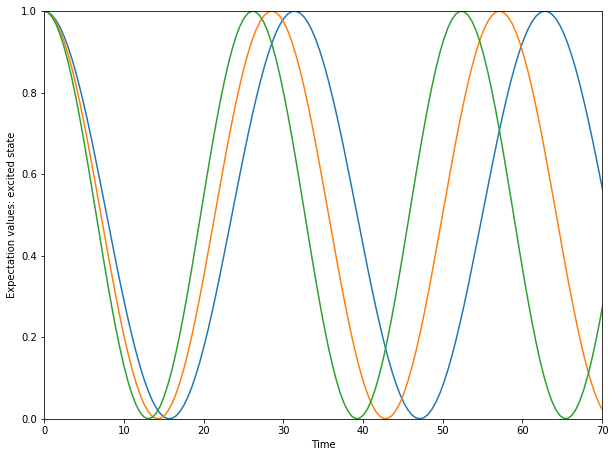

In [3]:
w0 = 1
w1 = 1
lam = 0.1
i = 10
wc = w0
wa = w1
k = 300
times = np.linspace(0, 150, k)
fig1, ax1 = plt.subplots(figsize=(10, 7.5), dpi=72)
for c in range(3):
    rho0 = ket2dm(tensor(basis(i, 0), basis(2, 1)))
    H = wc * tensor(num(i), qeye(2)) + wa * tensor(qeye(i), (-sigmaz() + qeye(2)) / 2) + \
        lam * (tensor(destroy(i), sp) + tensor(create(i), sm))
    result = mesolve(H, rho0, times)
    ax1.plot(times, [expect((result.states[k]).ptrace([1]), Qobj([[0], [1]])) for k in range(k)],
             label=r'$\hbar \lambda$ = %.2f' % lam)
    lam += 0.01
ax1.set_xlabel('Time')
ax1.set_ylabel('Expectation values: excited state')
axes = plt.gca()
axes.set_xlim([0, 70])
axes.set_ylim([0, 1])
plt.show()

Then we consider the situation when initially the qubit was in an excited state and the oscillator in a coherent state:

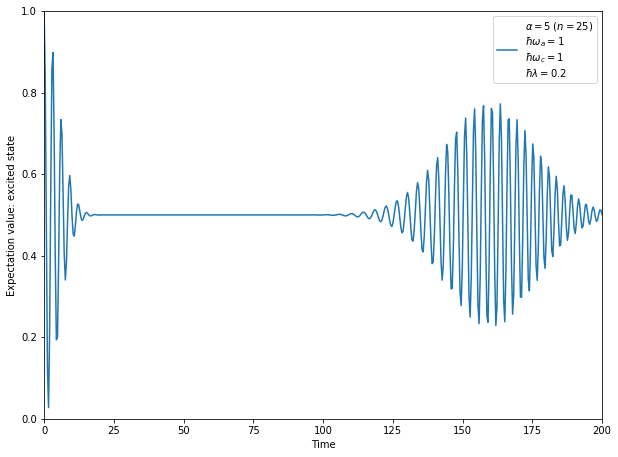

In [4]:
w0 = 1
w1 = 1
lam = 0.2
i = 50
wc = w0
wa = w1
k = 500
times = np.linspace(0, 200, k)
fig, ax1 = plt.subplots(figsize=(10, 7.5), dpi=72)
rho0 = ket2dm(tensor(coherent(i, 5), basis(2, 1)))
H = wc * tensor(num(i), qeye(2)) + wa * tensor(qeye(i), (-sigmaz() + qeye(2)) / 2) + \
    lam * (tensor(destroy(i), sp) + tensor(create(i), sm))
result = mesolve(H, rho0, times, options=Options(nsteps=1000))
ax1.plot(times, [expect((result.states[k]).ptrace([1]), Qobj([[0], [1]])) for k in range(k)],
         label=(r'$\alpha = 5 \;(n = 25)$' + '\n' + r'$\hbar \omega_a = 1$' + '\n'
                                           + r'$\hbar \omega_c = 1$'+ '\n' + r'$\hbar \lambda = 0.2$'))
ax1.set_xlabel('Time')
ax1.set_ylabel('Expectation value: excited state')
ax1.axes.set_xlim([0, 200])
ax1.axes.set_ylim([0, 1])
ax1.legend(loc='upper right')
plt.show()

Here we use a full Hamiltonian with no approximations and in the initial conditions as in the paragraph above:

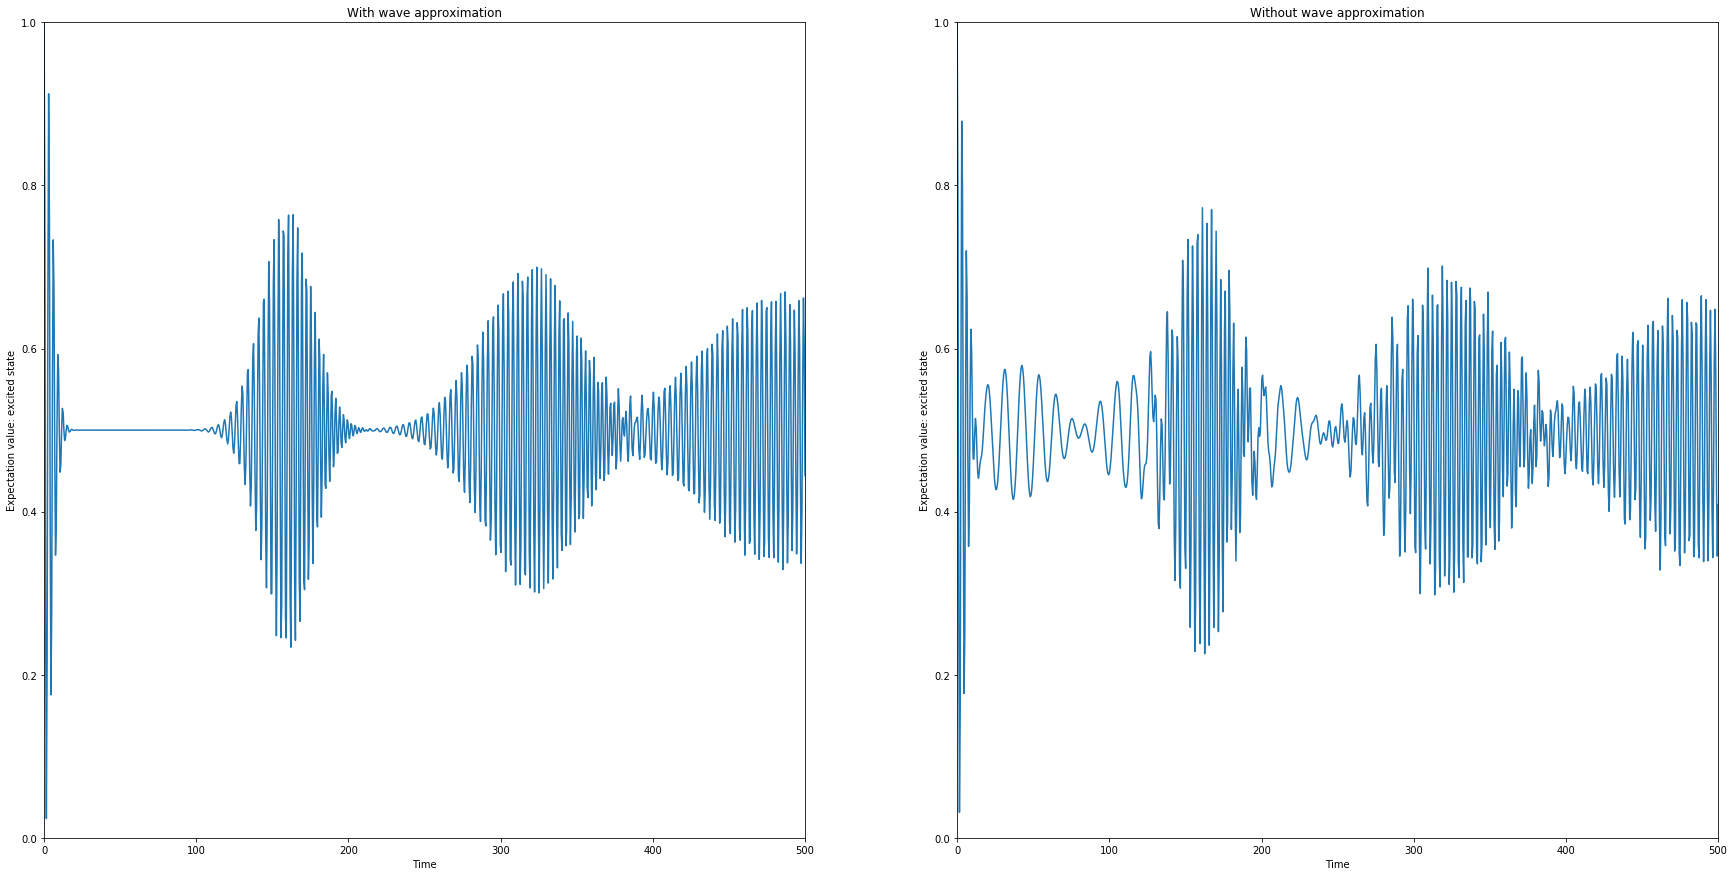

In [5]:
w0 = 6
w1 = 6
lam = 0.2
i = 50
wc = w0
wa = w1
k = 1000
times = np.linspace(0, 500, k)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(30, 15), dpi=72)
rho0 = ket2dm(tensor(coherent(i, 5), basis(2, 1)))

H1 = wc * tensor(num(i), qeye(2)) + wa * tensor(qeye(i), (-sigmaz() + qeye(2)) / 2) + \
    lam * (tensor(destroy(i), sp) + tensor(create(i), sm))
result1 = mesolve(H1, rho0, times, options=Options(nsteps=4000))
ax1.plot(times, [expect((result1.states[k]).ptrace([1]), Qobj([[0], [1]])) for k in range(k)])
ax1.set_xlabel('Time')
ax1.set_ylabel('Expectation value: excited state')
ax1.set_title('With wave approximation')
ax1.axes.set_xlim([0, 500])
ax1.axes.set_ylim([0, 1])

H2 = wc * tensor(num(i), qeye(2)) + wa * tensor(qeye(i), (-sigmaz() + qeye(2)) / 2) + \
    lam * (tensor((destroy(i) + create(i)), (sp + sm)))
result2 = mesolve(H2, rho0, times, options=Options(nsteps=4000))
ax2.plot(times, [expect((result2.states[k]).ptrace([1]), Qobj([[0], [1]])) for k in range(k)])
ax2.set_xlabel('Time')
ax2.set_ylabel('Expectation value: excited state')
ax2.set_title('Without wave approximation')
ax2.axes.set_xlim([0, 500])
ax2.axes.set_ylim([0, 1])
plt.show()

Here we introduce the environment (bath). The thing is that we want to have a system of qubit and bath (environment), where the qubit can radiate into the environment. The dynamics of the system is found using the Lindblad equation (we use collapse-operators in qutip):

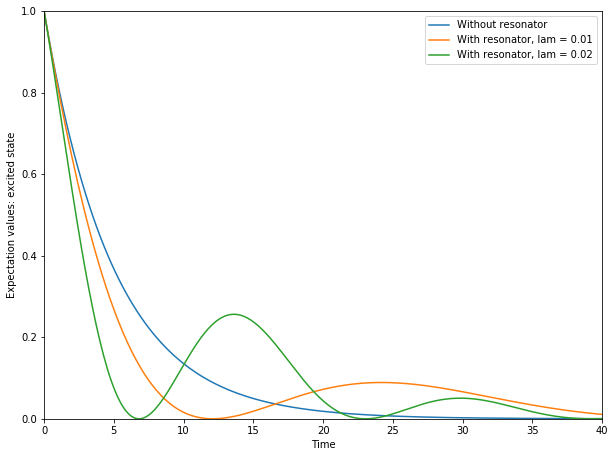

In [6]:
lam = 0
gamma = 0.2
i = 10
wc = 1
wa = 1
k = 300
times = np.linspace(0, 40, k)
fig1, ax1 = plt.subplots(figsize=(10, 7.5), dpi=72)
rho0 = ket2dm(tensor(basis(i, 0), basis(2, 1)))
collaps = np.sqrt(gamma) * tensor(qeye(i), sm)

H1 = wc * tensor(num(i), qeye(2)) + wa * tensor(qeye(i), (-sigmaz() + qeye(2)) / 2) + \
    lam * (tensor(destroy(i), sp) + tensor(create(i), sm))
result1 = mesolve(H1, rho0, times, [collaps], [])
ax1.plot(times, [expect((result1.states[k]).ptrace([1]), Qobj([[0], [1]])) for k in range(k)],
         label='Without resonator')
lam += 0.1

H2 = wc * tensor(num(i), qeye(2)) + wa * tensor(qeye(i), (-sigmaz() + qeye(2)) / 2) + \
    lam * (tensor(destroy(i), sp) + tensor(create(i), sm))
result2 = mesolve(H2, rho0, times, [collaps], [])
ax1.plot(times, [expect((result2.states[k]).ptrace([1]), Qobj([[0], [1]])) for k in range(k)],
         label='With resonator, lam = 0.01')
lam += 0.1

H3 = wc * tensor(num(i), qeye(2)) + wa * tensor(qeye(i), (-sigmaz() + qeye(2)) / 2) + \
    lam * (tensor(destroy(i), sp) + tensor(create(i), sm))
result3 = mesolve(H3, rho0, times, [collaps], [])
ax1.plot(times, [expect((result3.states[k]).ptrace([1]), Qobj([[0], [1]])) for k in range(k)],
         label='With resonator, lam = 0.02')

ax1.set_xlabel('Time')
ax1.set_ylabel('Expectation values: excited state')
ax1.set_xlim([0, 40])
ax1.set_ylim([0, 1])
ax1.legend(loc='upper right')
plt.show()

And here we will recollect about the oscillator. We consider that a qubit can emit to the environment (with a coefficient $\gamma_1$) and may in the oscillator, and the oscillator energy can also flow into the bath (with a coefficient $\gamma_2$):

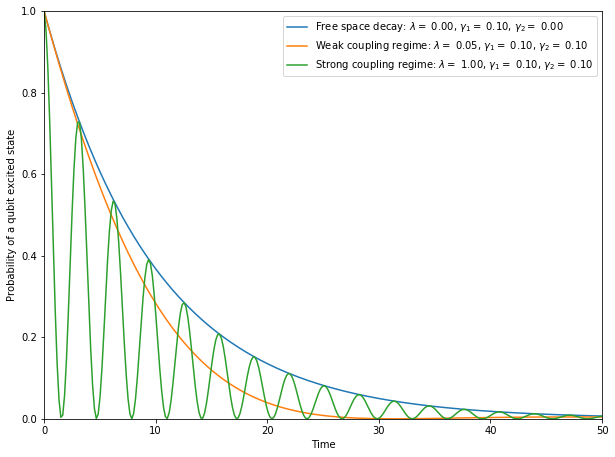

In [7]:
i = 15
wc = 1
wa = 1
k = 300
times = np.linspace(0, 50, k)
fig1, ax1 = plt.subplots(figsize=(10, 7.5), dpi=72)
rho0 = ket2dm(tensor(basis(i, 0), basis(2, 1)))

lam = 0
gamma1 = 0.1
gamma2 = 0
collaps1 = np.sqrt(gamma1) * tensor(qeye(i), sm)
collaps2 = np.sqrt(gamma2) * tensor(destroy(i), qeye(2))
H = wc * tensor(num(i), qeye(2)) + wa * tensor(qeye(i), (-sigmaz() + qeye(2)) / 2) + \
    lam * (tensor(destroy(i), sp) + tensor(create(i), sm))
result1 = mesolve(H, rho0, times, [collaps1, collaps2])
ax1.plot(times, [expect((result1.states[k]).ptrace([1]), Qobj([[0], [1]])) for k in range(k)],
         label=r'Free space decay: $\lambda = $ %.2f, $\gamma_1 = $ %.2f, $\gamma_2 = $ %.2f' \
         % (lam, gamma1, gamma2))

lam = 0.05
gamma1 = 0.1
gamma2 = 0.1
H = wc * tensor(num(i), qeye(2)) + wa * tensor(qeye(i), (-sigmaz() + qeye(2)) / 2) + \
        lam * (tensor(destroy(i), sp) + tensor(create(i), sm))
collaps1 = np.sqrt(gamma1) * tensor(qeye(i), sm)
collaps2 = np.sqrt(gamma2) * tensor(destroy(i), qeye(2))
result2 = mesolve(H, rho0, times, [collaps1, collaps2])
ax1.plot(times, [expect((result2.states[k]).ptrace([1]), Qobj([[0], [1]])) for k in range(k)],
         label=r'Weak coupling regime: $\lambda = $ %.2f, $\gamma_1 = $ %.2f, $\gamma_2 = $ %.2f' \
         % (lam, gamma1, gamma2))

lam = 1
gamma1 = 0.1
gamma2 = 0.1
H = wc * tensor(num(i), qeye(2)) + wa * tensor(qeye(i), (-sigmaz() + qeye(2)) / 2) + \
    lam * (tensor(destroy(i), sp) + tensor(create(i), sm))
collaps1 = np.sqrt(gamma1) * tensor(qeye(i), sm)
collaps2 = np.sqrt(gamma2) * tensor(destroy(i), qeye(2))
result3 = mesolve(H, rho0, times, [collaps1, collaps2])
ax1.plot(times, [expect((result3.states[k]).ptrace([1]), Qobj([[0], [1]])) for k in range(k)],
         label=r'Strong coupling regime: $\lambda = $ %.2f, $\gamma_1 = $ %.2f, $\gamma_2 = $ %.2f' \
         % (lam, gamma1, gamma2))

ax1.set_xlabel('Time')
ax1.set_ylabel('Probability of a qubit excited state')
ax1.legend(loc='upper right')
ax1.set_xlim([0, 50])
ax1.set_ylim([0, 1])
plt.show()

Here we check the Purcell effect. To do this, we will compare the values for different $\gamma_2$ and make sure that there is approximately linear dependence (the probability that the qubit will emit a photon decreases linearly with the decrease of $\gamma_2$):

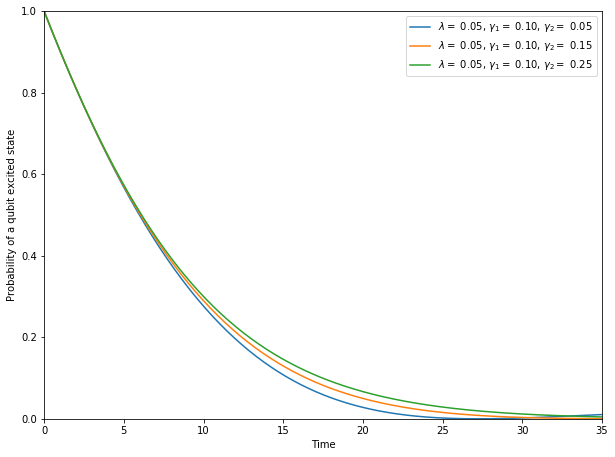

In [8]:
i = 15
wc = 1
wa = 1
k = 300
times = np.linspace(0, 35, k)
fig1, ax1 = plt.subplots(figsize=(10, 7.5), dpi=72)
rho0 = ket2dm(tensor(basis(i, 0), basis(2, 1)))

lam = 0.05
gamma1 = 0.1
gamma2 = 0.05
for j in range(3):
    H = wc * tensor(num(i), qeye(2)) + wa * tensor(qeye(i), (-sigmaz() + qeye(2)) / 2) + \
            lam * (tensor(destroy(i), sp) + tensor(create(i), sm))
    collaps1 = np.sqrt(gamma1) * tensor(qeye(i), sm)
    collaps2 = np.sqrt(gamma2) * tensor(destroy(i), qeye(2))
    result2 = mesolve(H, rho0, times, [collaps1, collaps2])
    ax1.plot(times, [expect((result2.states[k]).ptrace([1]), Qobj([[0], [1]])) for k in range(k)],
             label=r'$\lambda = $ %.2f, $\gamma_1 = $ %.2f, $\gamma_2 = $ %.2f' % (lam, gamma1, gamma2))
    gamma2 += 0.1

ax1.set_xlabel('Time')
ax1.set_ylabel('Probability of a qubit excited state')
ax1.legend(loc='upper right')
ax1.set_xlim([0, 35])
ax1.set_ylim([0, 1])
plt.show()